导包

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

将每个图片读取的数据添加到样本列表中
- 样本分X_train (特征)和y_train（目标）
- 图片的路径, 0/0_1.bmp 格式
- plt.imread(img_path).ravel()  将二维扁平化处理成一维后添加到样本特征列表中

In [2]:
img = plt.imread('0/0_1.bmp') # 查看某一张图片的shape
img.shape

(28, 28)

In [3]:
samples = []  # 样本数据集
target = []   # 目标数据集

for digit in range(10):
    for i in range(1, 501):  # 每个数字有500张图片
        img = plt.imread(f'{digit}/{digit}_{i}.bmp')
        # 将二维图片的数据转成一维的数据, 且添加到样本数据中
        samples.append(img.ravel())
        
        # 添加目标数据
        target.append(digit)
        
samples = np.array(samples)
target = np.array(target)

In [4]:
samples.shape

(5000, 784)

In [5]:
target.shape

(5000,)

切分训练数据与测试数据
- sklearn.model_selection.train_test_split()函数切分
- 第一个参数为 samples
- 第二个参数为 target
- 返回 X_train, X_test, y_train, y_test

In [6]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(samples,
                                                   target,
                                                   test_size=0.2)

In [10]:
display(X_train.shape, X_test.shape)

(4000, 784)

(1000, 784)

In [13]:
display(Series(y_train).unique(),Series(y_test).unique())

array([2, 7, 4, 3, 1, 5, 0, 9, 6, 8])

array([3, 9, 7, 0, 4, 1, 5, 6, 8, 2])

训练与预测: KNeighborsClassifier
- knnclf = KNeighborsClassifier(n_neighbors=5)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

查看得分
- knnclf.score(X_test,y_test)

In [24]:
knn_clf.score(X_test, y_test)

0.94999999999999996

In [18]:
# 如何设置n_neighbors最合适的参数值
for ns in range(7, 20, 2):
    knn_clf = KNeighborsClassifier(n_neighbors=ns)
    knn_clf.fit(X_train, y_train)
    print(f'neighbors={ns}',
          knn_clf.score(X_test, y_test))

neighbors=7 0.941
neighbors=9 0.941
neighbors=11 0.938
neighbors=13 0.935
neighbors=15 0.93
neighbors=17 0.926
neighbors=19 0.927
neighbors=21 0.917
neighbors=23 0.917
neighbors=25 0.912
neighbors=27 0.903
neighbors=29 0.906
neighbors=31 0.903
neighbors=33 0.901
neighbors=35 0.899


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-f0b14b71f4e5>", line 6, in <module>
    knn_clf.score(X_test, y_test))
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/base.py", line 349, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/classification.py", line 145, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py", line 385, in kneighbors
    for s in gen_even_slices(X.shape[0], n_jobs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py", line 779, in __call__
    while self.dispatch_one_batch(iterator):
  File "/Users/apple/anaconda3/lib/p

KeyboardInterrupt: 

In [31]:
# 预测一个手写数字
t1 = plt.imread('test/4.bmp').max(axis=2)
t2 = plt.imread('test/7.bmp').max(axis=2)
display(t1.shape, t2.shape)

(28, 28)

(28, 28)

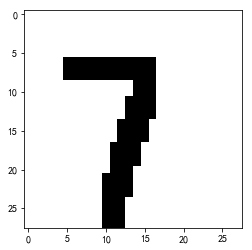

In [36]:
plt.imshow(t2, cmap='gray')

In [33]:
tests =np.array([
    t1.ravel(),
    t2.ravel(),
])

knn_clf.predict(tests)

array([8, 1])

In [38]:
y_test.shape

(1000,)

绘制图形（预测值和真实值表达出来）
- 可以查看前100个样本数据, 即10行10列
- plt.imshow()显示图片
    - plt.imshow(X_test[i].reshape(28,28),cmap='gray') 样本数据恢复二维

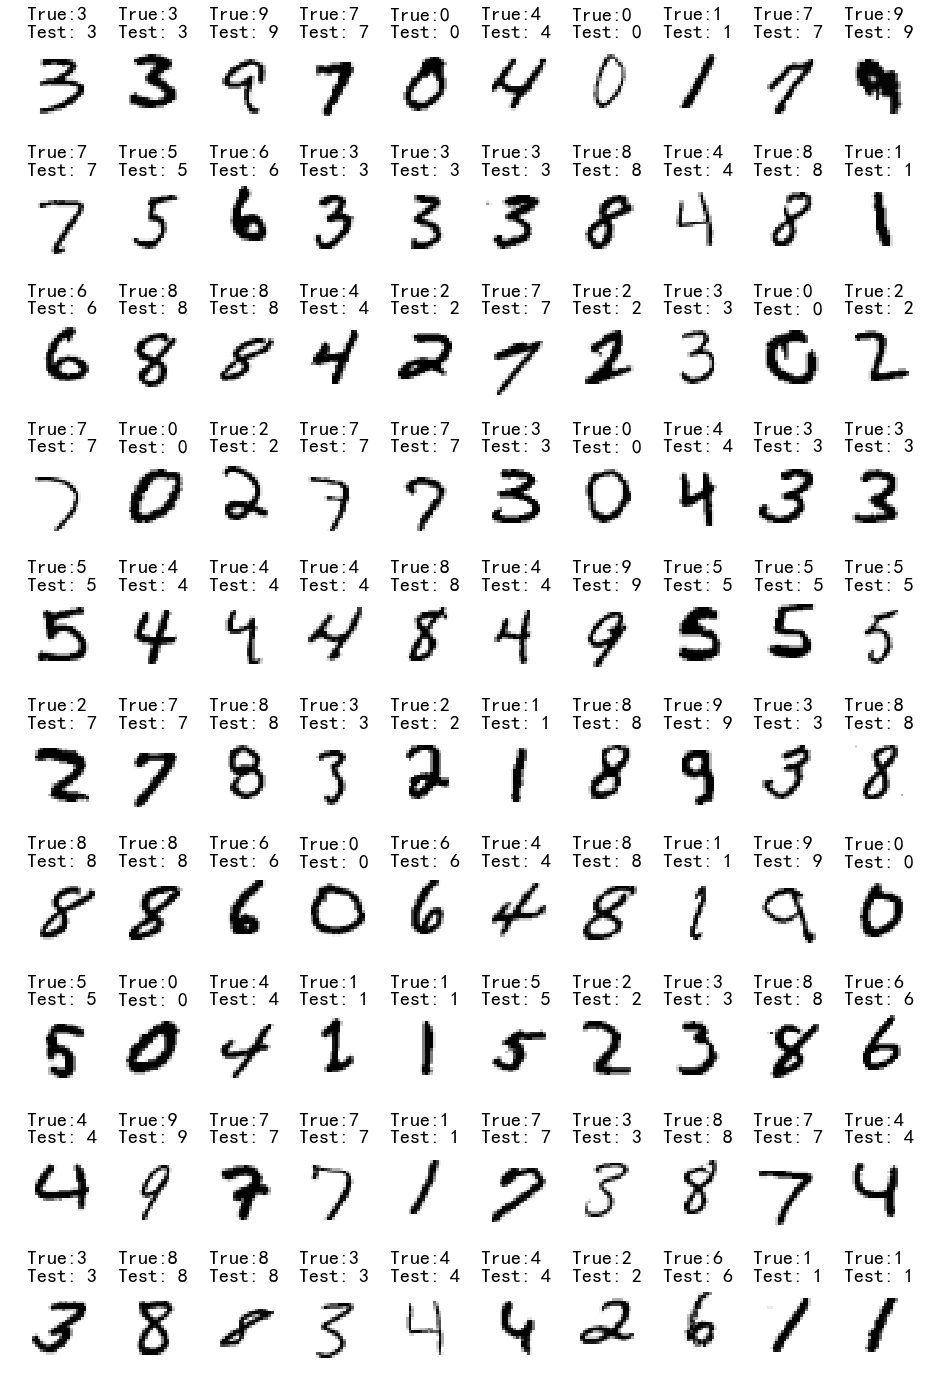

In [45]:
plt.figure(figsize=(16, 25))

# 训练前100个样本数据
y_ = knn_clf.predict(X_test[:100])

for i in range(0, 100):  # X_test
    ax = plt.subplot(10, 10, i+1)  # 第i+1张子画布
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'True:{y_test[i]} \nTest: {y_[i]}',
                fontdict=dict(fontsize=20))
    ax.axis('off')  # 不显示坐标轴

plt.show()